# Exploring / Visualing Spectra for the z < 0.04 Sample (45gals)
* What do they look like? 
* What similarities are there? 
* Is there a line(s) common to ALL clumps? 
* For those with 2 or more, is there a difference between clump and nucleus? (yes, obvi)

In [1]:
import astropy.io.fits as fits
from astropy.table import Table
import glob, pdb
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib
from display_jpegs import *
%matplotlib inline

/home/oxymoronic/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [205]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [215]:
def plot_spectra_and_jpegs(dat):

    gs=gridspec.GridSpec(len(dat),5)
    gs.update(wspace=0)
    gs.update(hspace=0)

    fig = plt.figure(figsize=(30,len(dat)*7))

    # ISOLATE UNIQUE SPECTRA FOR EACH GALAXY -- (often SEVERAL at the exact same coordinates)
    # Loop through each galaxy

    i = 0
    for d in dat:
        # Reset j
        j = 0
    
        # First, plot the jpeg of the galaxy (the kind with the red spectra boxes)
        ax = plt.subplot(gs[i,j])
        plt.imshow(get_image_from_url(d['DR12url']), interpolation='nearest')

        #plt.tick_params(labelbottom='off',labelleft='off')
        ax.set_xticks([])
        ax.set_yticks([])
        # That's the 0th spot in the j coord -- increase it!
        j += 1
    
        # Loop through each spectra for that galaxy
        spectra_list = glob.glob('../data/spectra_final45/{0}/*.fits'.format(d['OBJID']))
       
        testset = set()
        specset = set()
        for spec in spectra_list:
        
            # Open the spectrum
            ss = fits.open(spec)  
        
            # Cast obj coords as a string        
            coordstring = str(ss[0].header['PLUG_RA'])+'_'+str(ss[0].header['PLUG_DEC'])
        
            if coordstring not in testset:
                testset.add(coordstring)
                specset.add(spec)
            
                # Check that we don't go beyond j=5!
                if j < 5:
                    # Plot that shit! :D
                    ax = plt.subplot(gs[i,j])
                    ax.plot(10**ss[1].data['loglam'], ss[1].data['flux'], color='k')
                    ax.set_xlim(3700, 9500)
                    ax.set_ylim(-50, 1200)

                    ax.set_xticks([4000, 5000, 6000, 7000, 8000, 9000])
                    ax.set_yticks([])
                    ax.set(adjustable='box-forced')
                    
                    
                    # Label some of the emission lines
                    #lines = ss[3].data
                    #linenames = ['[O_III]']
                
                    if i != len(dat)-1:
                        plt.tick_params(labelbottom='off', labelleft='off')
                    else:
                        plt.tick_params(labelleft='off')
                        ax.set_xlabel('Angstroms')
                
                    j+=1
            
        # If we're done with that galaxy, increase the row
        i+=1

## Plot spectra for z < 0.01

In [3]:
dat = Table.read('../data/clumpy_coadd_spectra_dr12_gzh.fits')

In [9]:
lowz = dat[dat['AVG_Z']<0.04]
#print lowz.colnames
for line in lowz:
    print line['OBJID']
#lowz.write('../data/clumpy_coadd_lowz_coords.csv',format='ascii.csv')

8647474690329084045
8647474690334458050
8647474690339438847
8647474690343043368
8647474690344747089
8647474690858942711
8647474690881749069
8647474690883846156
8647474690887909626
8647474690891186220
8647474691387491512
8647474691400204480
8647474691427205226
8647474691428581676
8647474691953983602
8647474692485415569
8647474693011210345
8647474693025300532
8647474693026873809
8647475119817098026
8647475119826534597
8647475119826862352
8647475119829090503
8647475119849472249
8647475119852290649
8647475120361308254
8647475120370221119
8647475120383263039
8647475120389554261
8647475120883827059
8647475120901062764
8647475120924131439
8647475121443766477
8647475121447632970
8647475121457397936
8647475121457529040
8647475121466572880
8647475121970348309
8647475121988567166
8647475121992761658
8647475122510954726
8647475122530025500
8647475122533171315
8647475122536382735
8647475122540642445


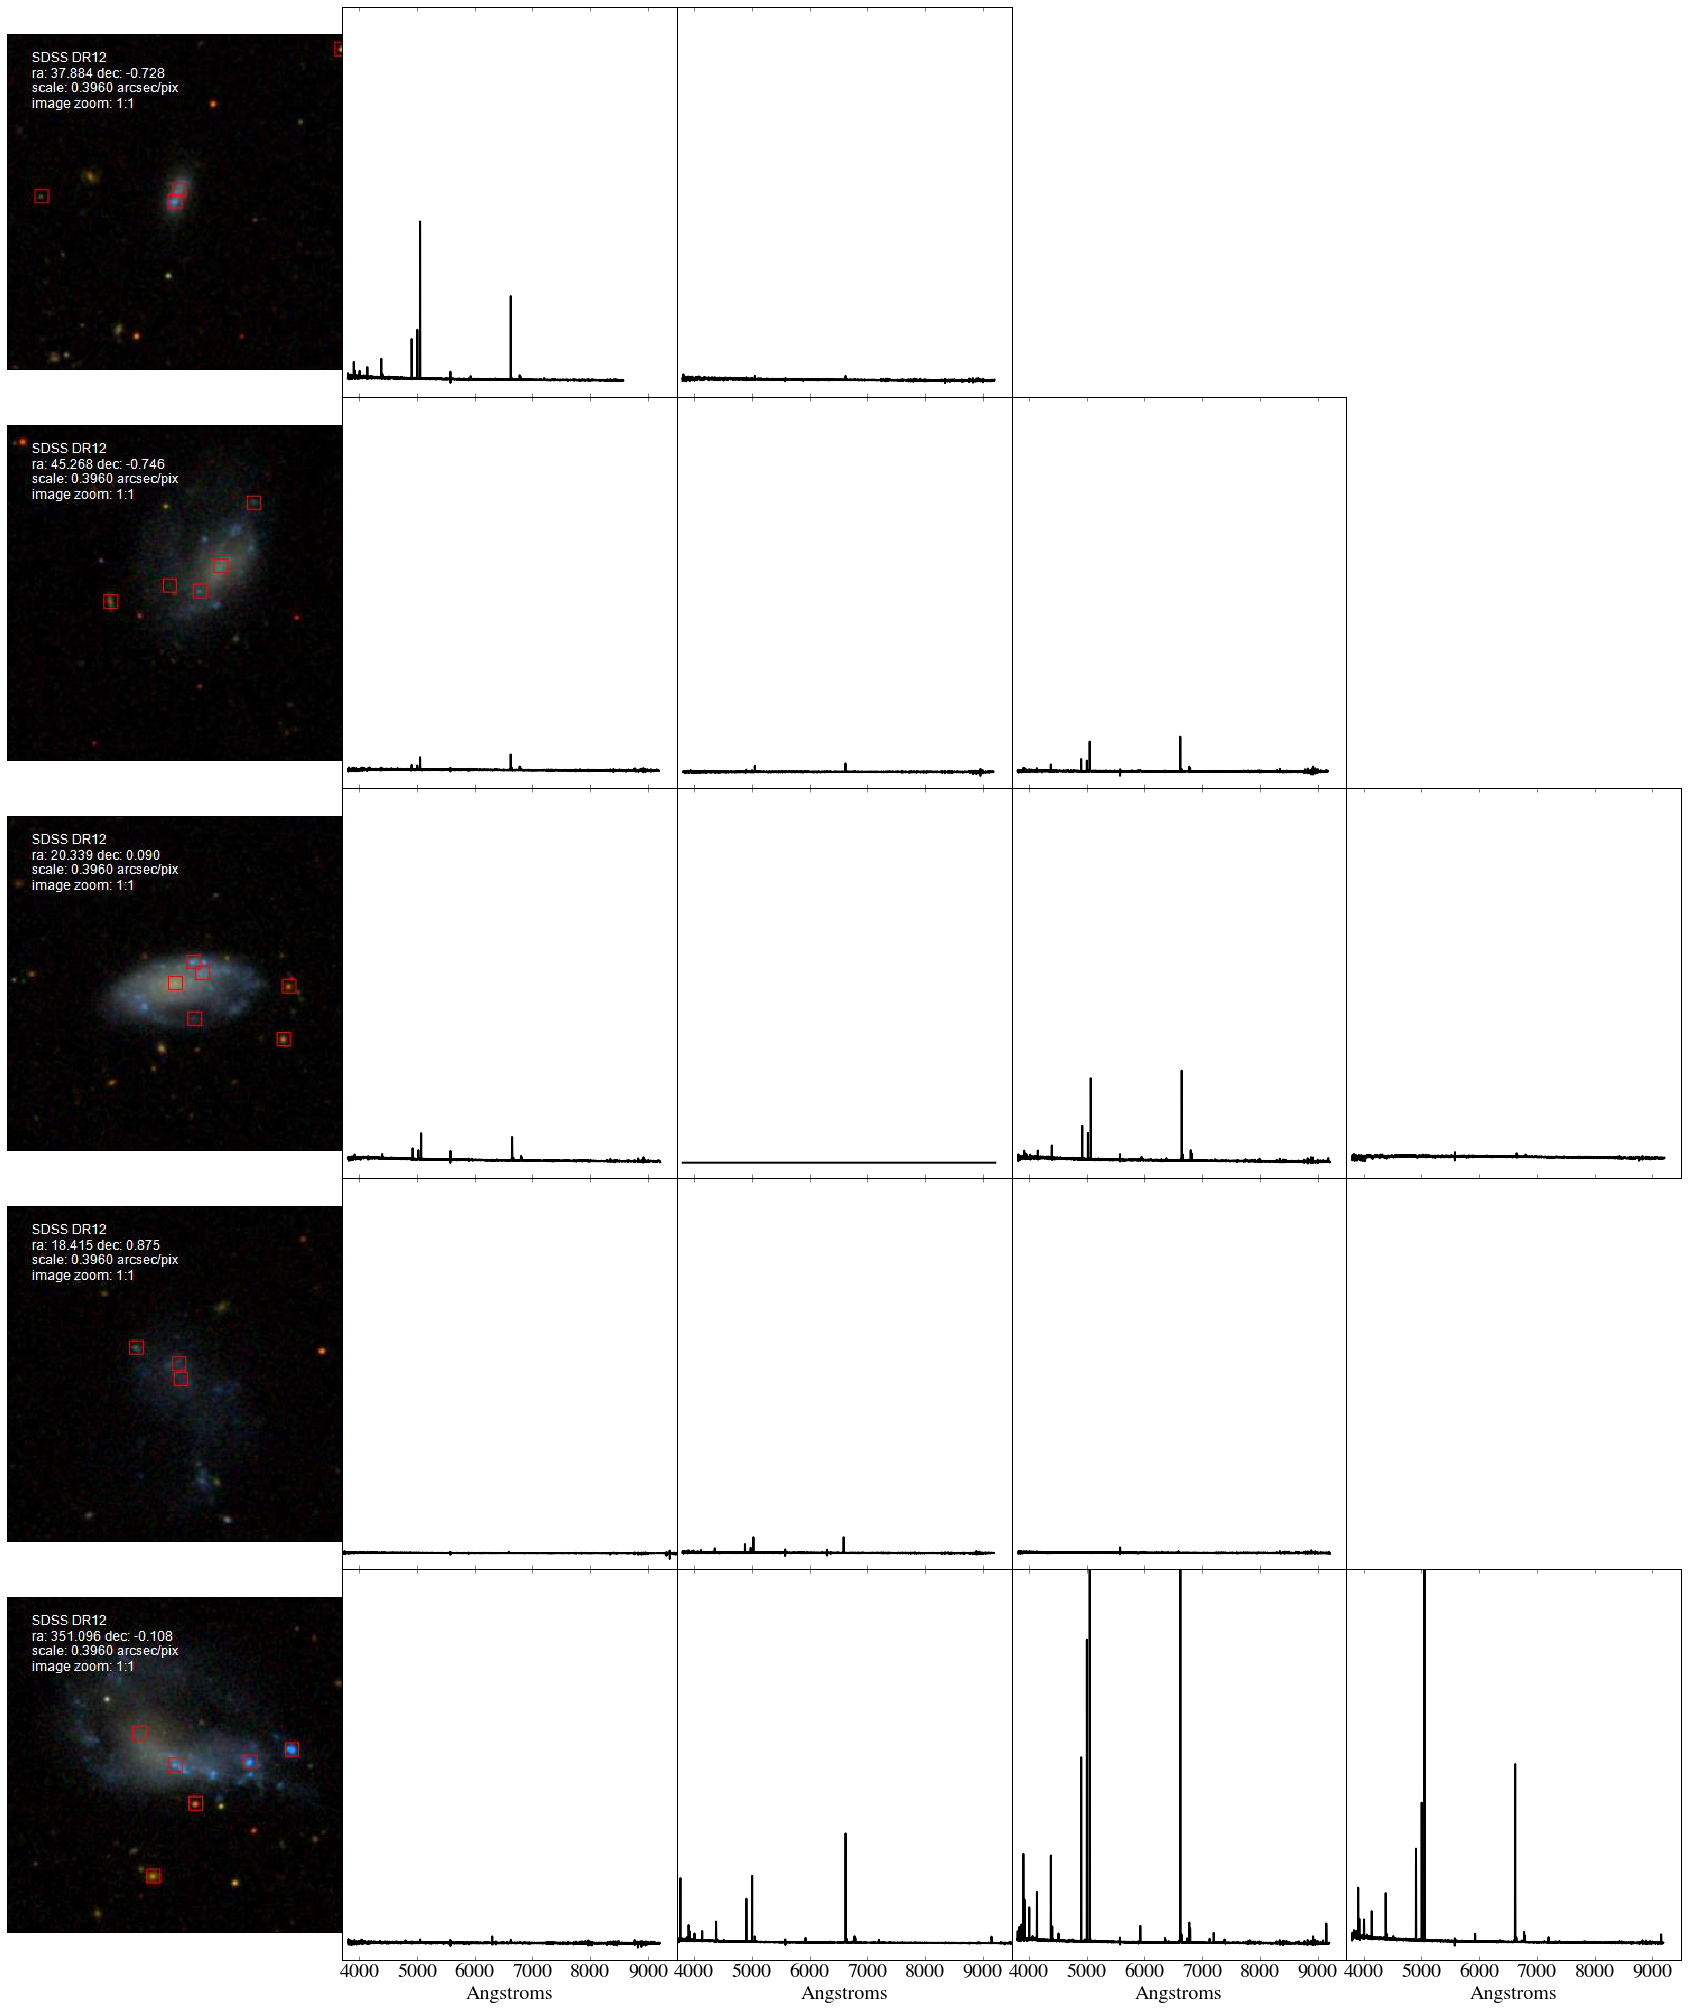

In [214]:
sample1 = dat[dat['AVG_Z']<=0.01]
plot_spectra_and_jpegs(sample1)

## Plot spectra for 0.01 < z < 0.02

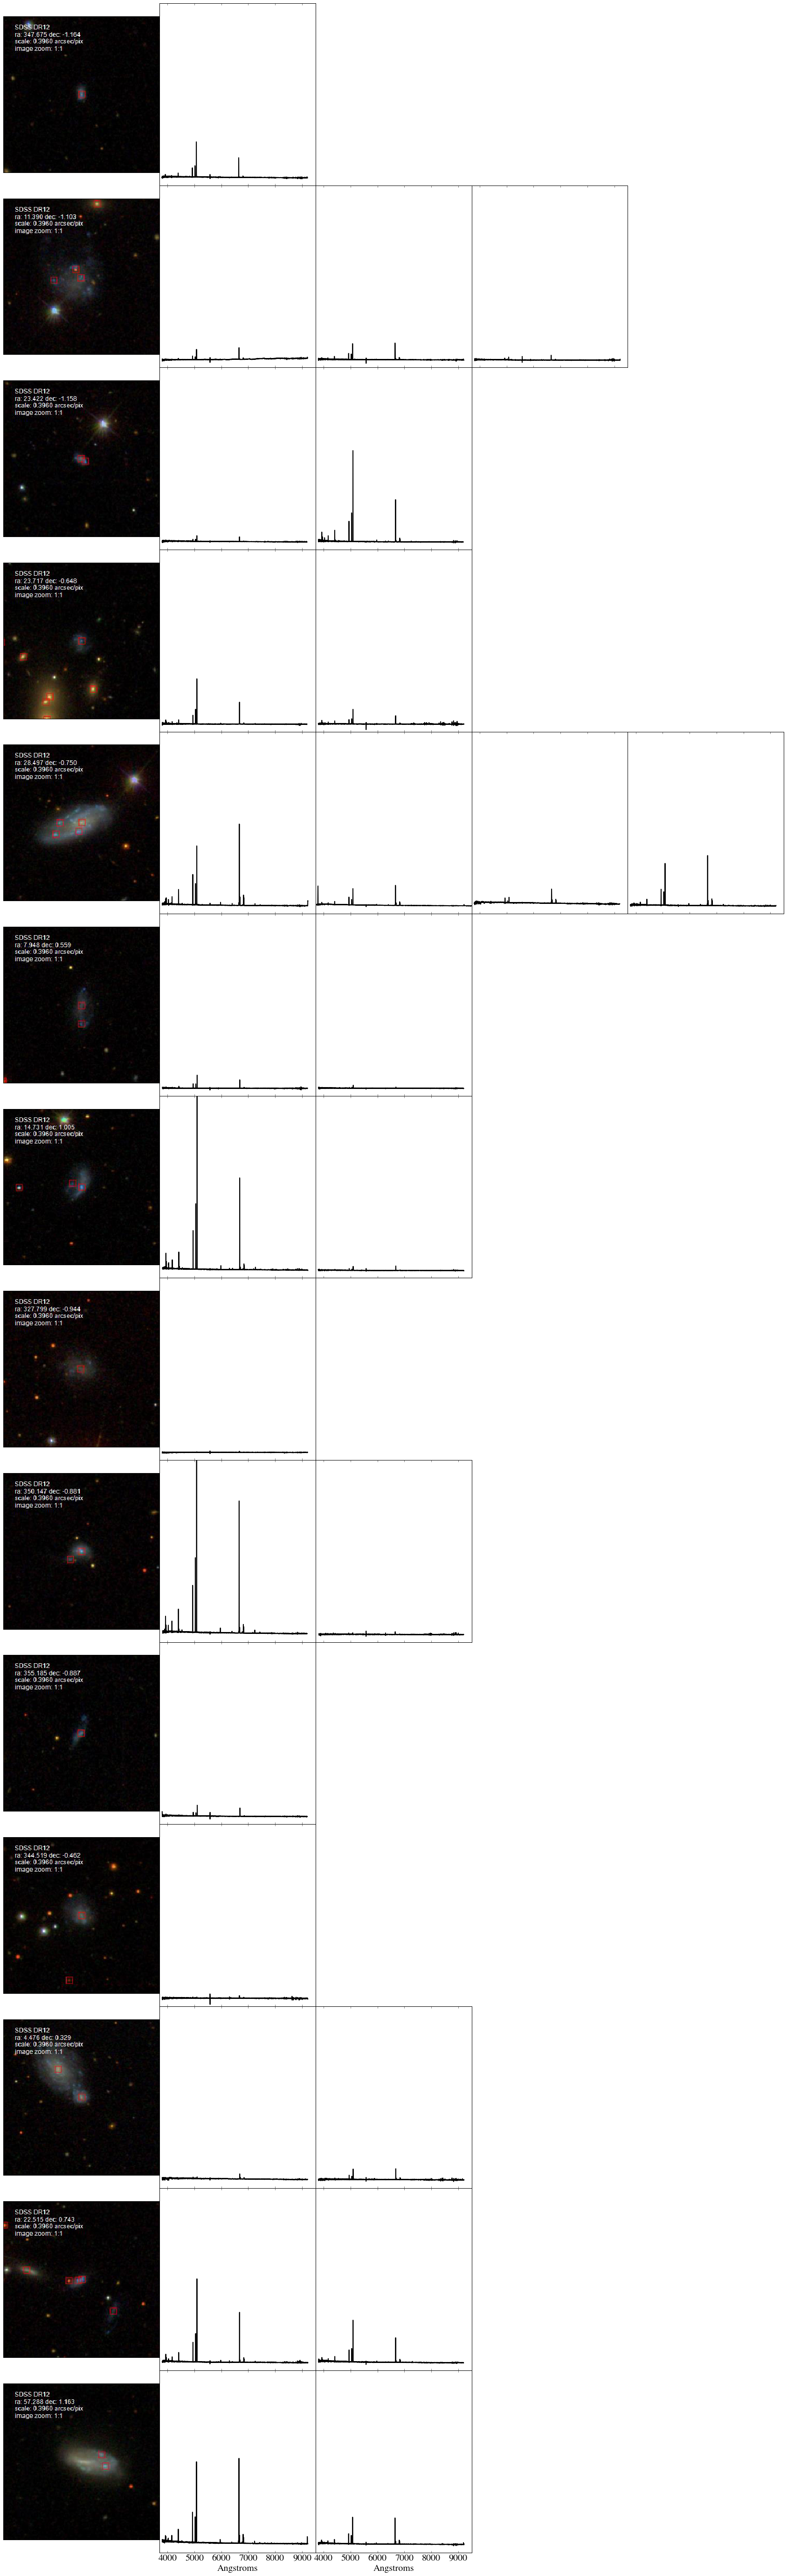

In [216]:
mask = np.where((dat['AVG_Z']>0.01) & (dat['AVG_Z']<=0.02))
sample2 = dat[mask]
plot_spectra_and_jpegs(sample2)

## Plot spectra for 0.02 < z 0.03

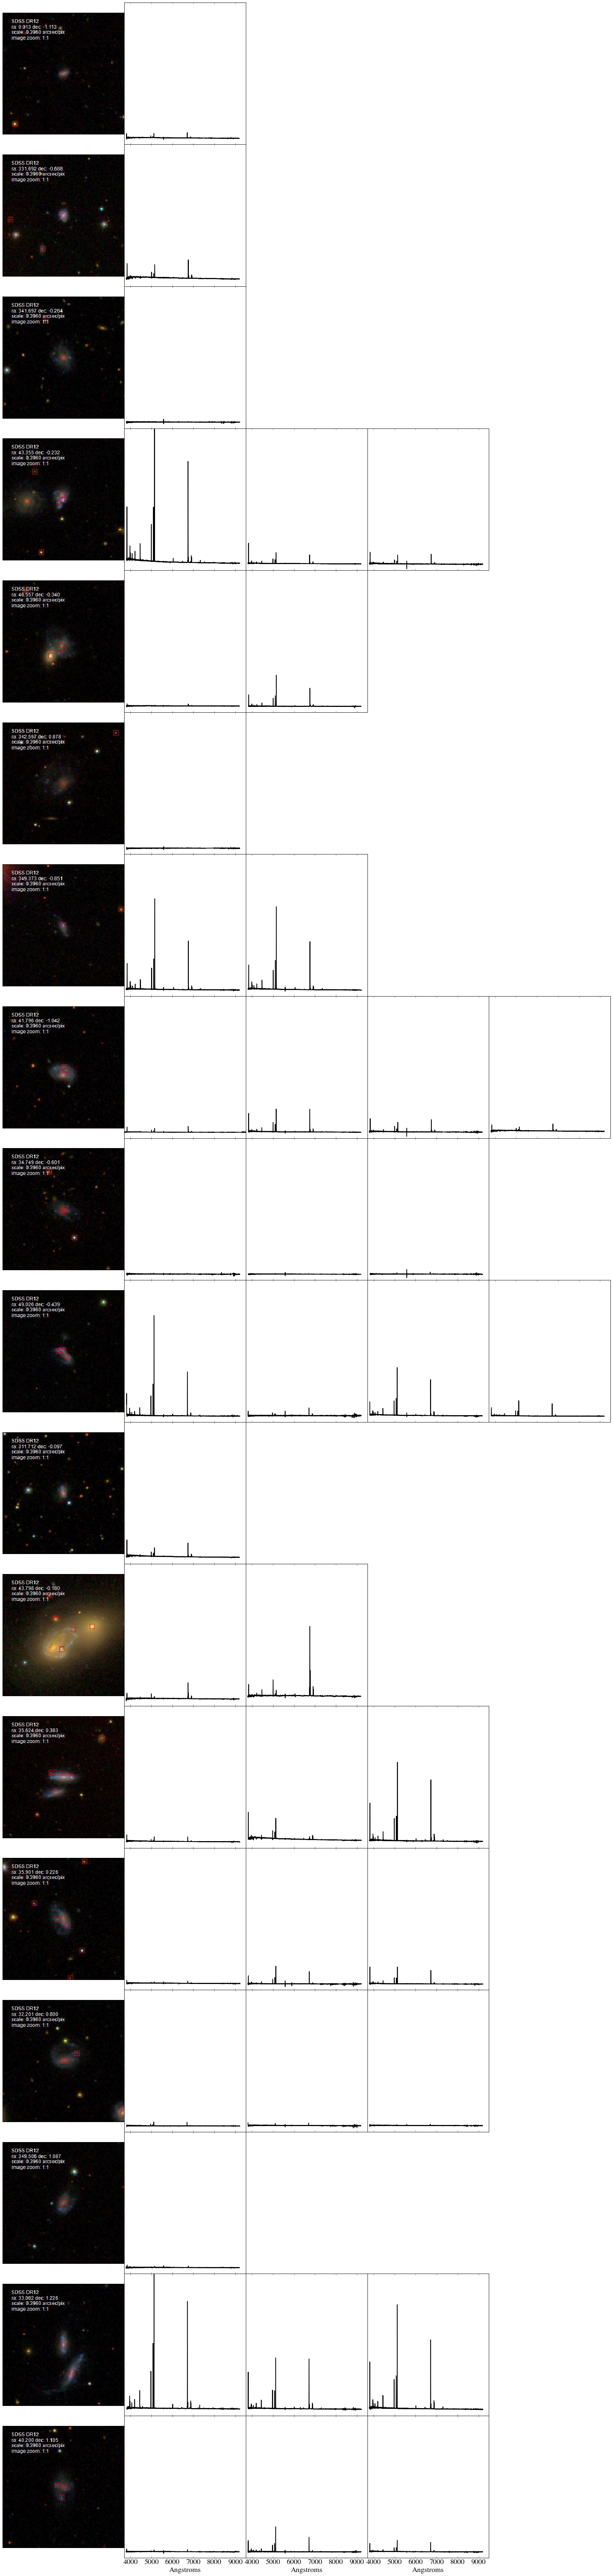

In [217]:
mask = np.where((dat['AVG_Z']>0.02) & (dat['AVG_Z']<=0.03))
sample3 = dat[mask]
plot_spectra_and_jpegs(sample3)

## Plot spectra 0.03 < z < 0.04

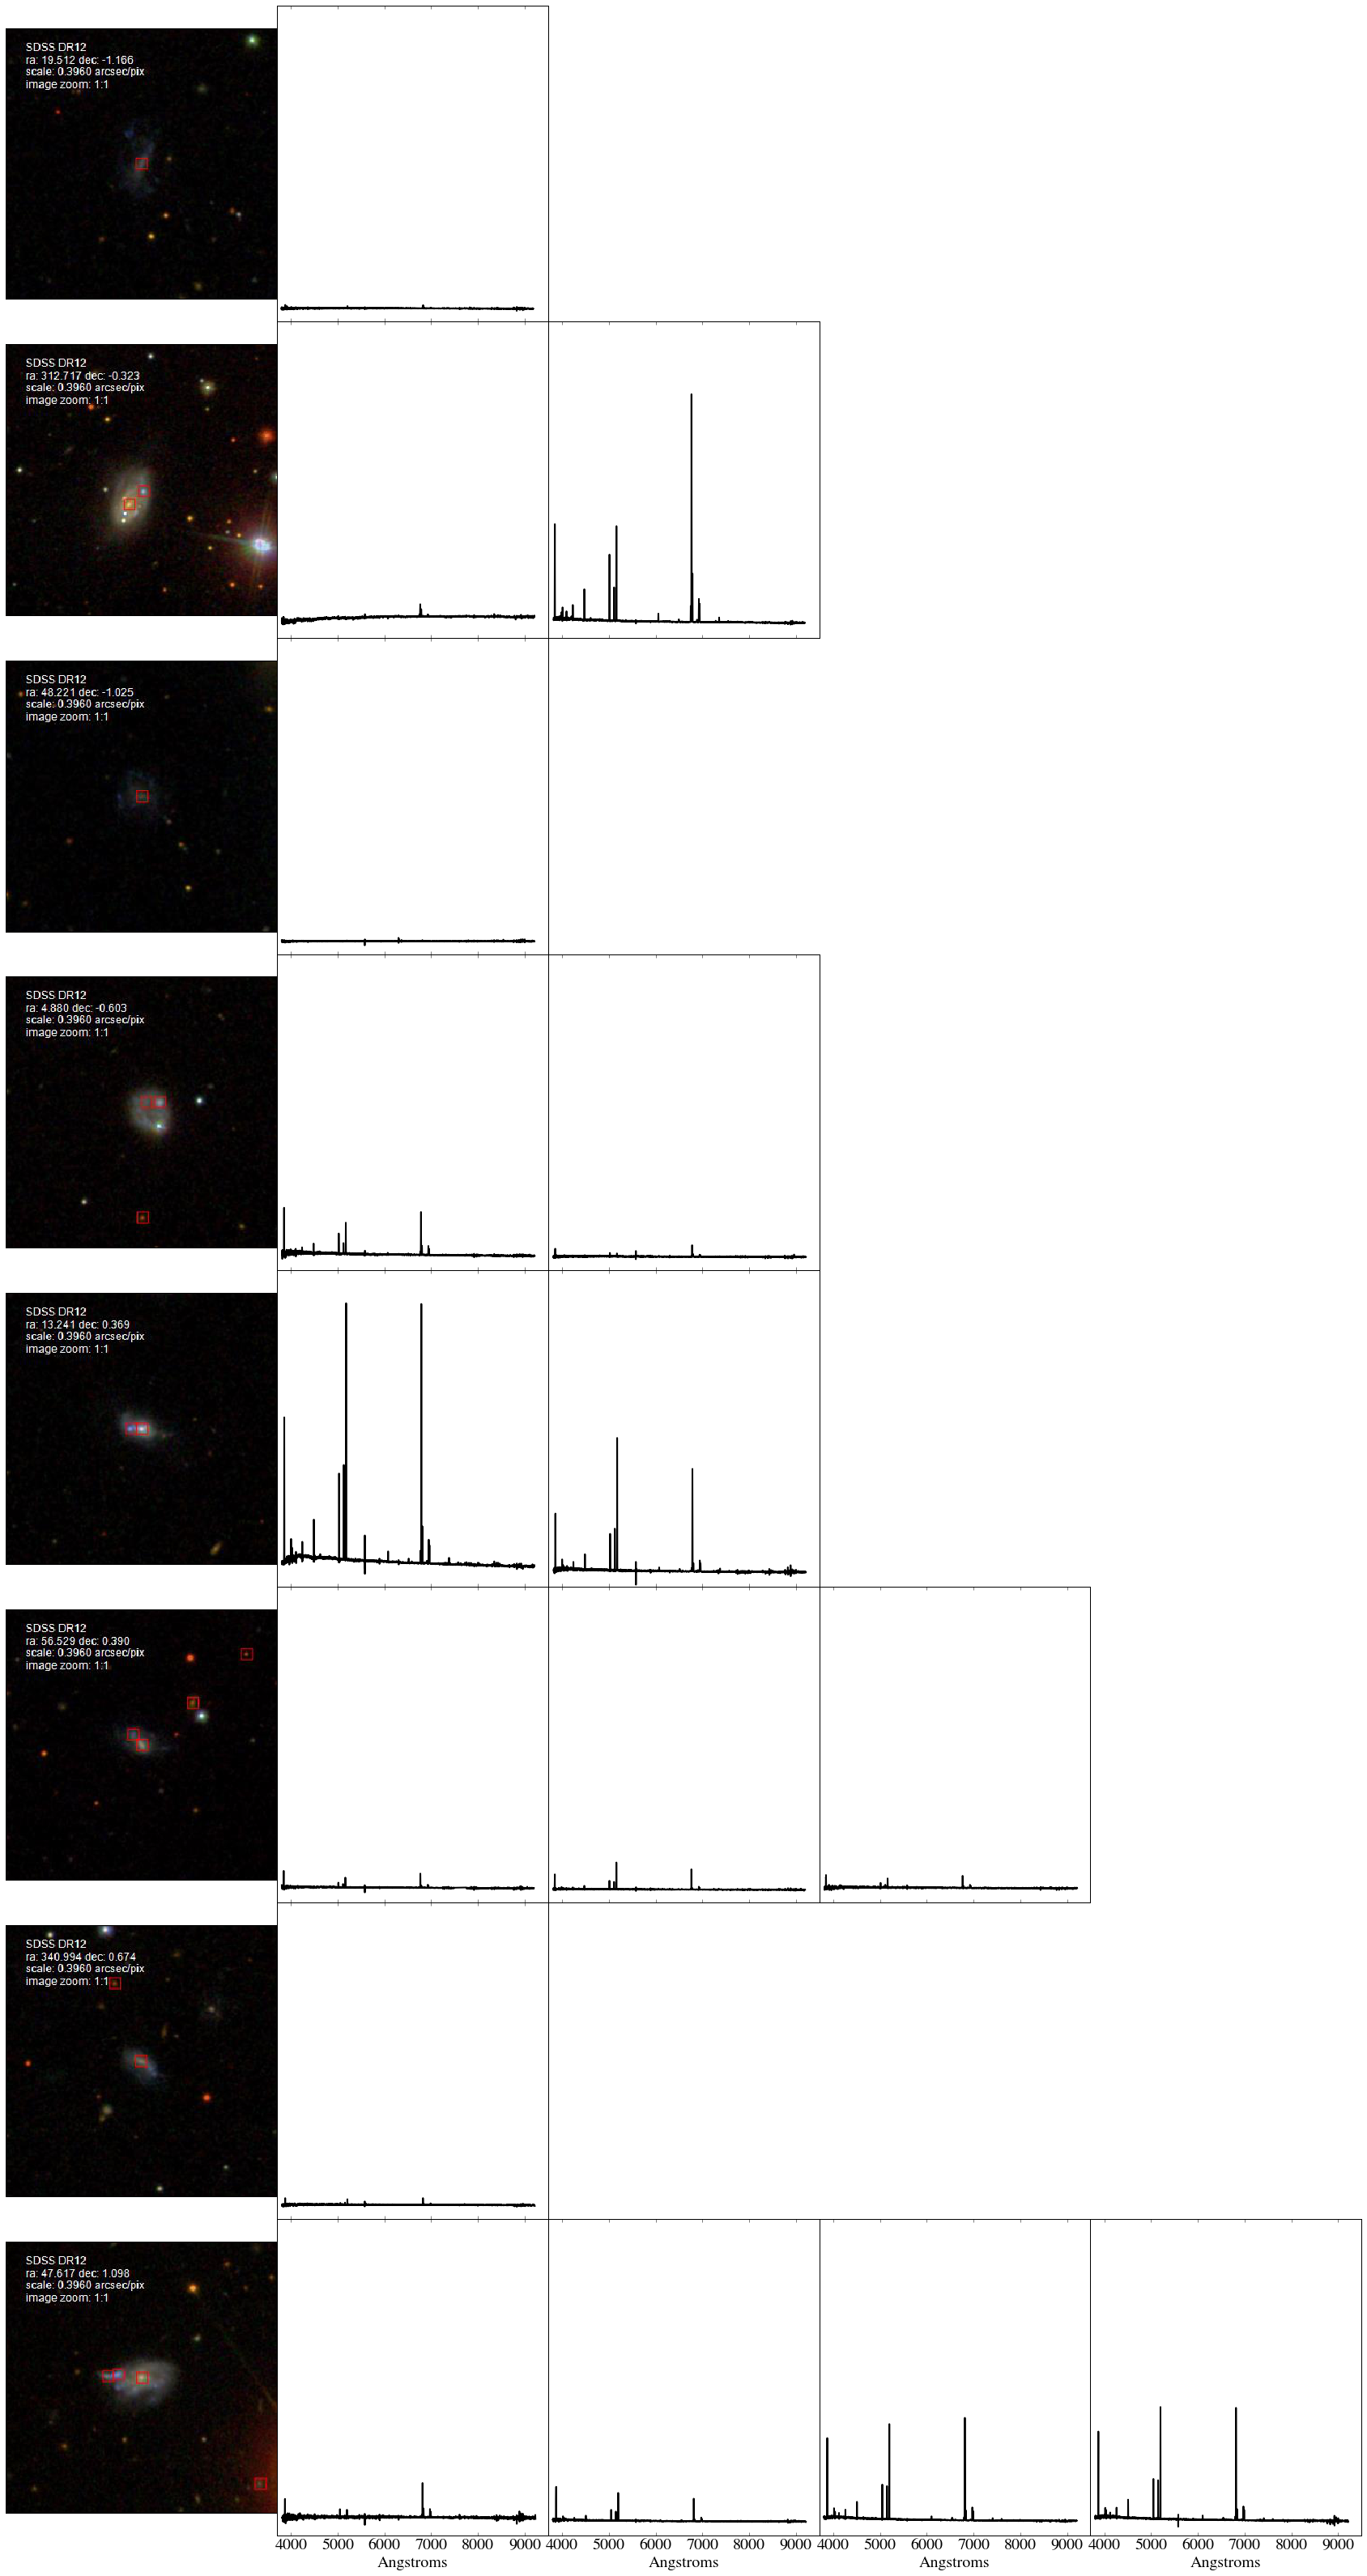

In [218]:
mask = np.where((dat['AVG_Z']>0.03) & (dat['AVG_Z']<=0.04))
sample4 = dat[mask]
plot_spectra_and_jpegs(sample4)